In [2]:
import pandas as pd
import numpy as np

In [303]:
origin = "/home/thiemcun/"
file_full_name_path = origin + "The-Mr.-or-Ms.-Dilemma-Can-You-Guess-Them-All/GenderPrediction/dataset/name_full.csv"
df = pd.read_csv(file_full_name_path) # full name
df

,Full_Name,Gender
0,Ngô Xuân Tùng,1
1,Bùi Dương Thảo Vy,0
2,Lưu Thế Huy,1
3,Nguyễn Thị Vân,0
4,Dương Minh Long,1
...,...,...
26846,Đoàn Thị Bảo Thu,0
26847,Ôn Hoa Thu,1
26848,Nguyễn Thị Huỳnh Như,0
26849,Nguyễn Thị Hồng Phúc,0


#### Removing duplicates rows

In [304]:
df1 = df.drop_duplicates()
df1

,Full_Name,Gender
0,Ngô Xuân Tùng,1
1,Bùi Dương Thảo Vy,0
2,Lưu Thế Huy,1
3,Nguyễn Thị Vân,0
4,Dương Minh Long,1
...,...,...
26844,Phạm Thị Cẩm Vân,0
26845,Nông Thị Huyền,0
26846,Đoàn Thị Bảo Thu,0
26847,Ôn Hoa Thu,1


#### Removing full name having one word and redundant spaces

In [313]:
data2 = {"Full_Name":[], "Gender":[]}

for fname, gender in zip(df1["Full_Name"], df1["Gender"]):
    fname_lst = fname.split()
    if len(fname_lst) > 1:
        fn = " ".join([word.strip() for word in fname_lst])
        data2["Full_Name"].append(fn)
        data2["Gender"].append(gender)
df2 = pd.DataFrame(data2)
df2

,Full_Name,Gender
0,Ngô Xuân Tùng,1
1,Bùi Dương Thảo Vy,0
2,Lưu Thế Huy,1
3,Nguyễn Thị Vân,0
4,Dương Minh Long,1
...,...,...
21212,Phạm Thị Cẩm Vân,0
21213,Nông Thị Huyền,0
21214,Đoàn Thị Bảo Thu,0
21215,Ôn Hoa Thu,1


In [467]:
full_name = df2["Full_Name"]
word_lst= []
for fname in full_name:

  word_lst+=fname.lower().split()
  if "c" in fname.lower().split():
    print(fname)

print("all words",len(word_lst))
word_set = set(word_lst)
print("all unique words",len(word_set))

Trần Mai Bảo Ngo c
Phan Tiê Ngo c
all words 71389
all unique words 1540


## 1.1 Finding OUTLIERS by checking with Vietnamese Dictionary
Outliers: "doanz", "y thien", "phạmngọc" , "H Phúc Long Dưng", "Trần Mai Bảo Ngo c" vẫn giữ tiếng hán nôm

In [414]:
viword =[]
with open(origin + "The-Mr.-or-Ms.-Dilemma-Can-You-Guess-Them-All/GenderPrediction/dataset/Viet74K.txt","r") as file:
  for line in file:
    line_lst = line.strip().split()
    for l in line_lst:   
      if len(l) > 1 or l in ['y']:
        viword.append(l)
  # Dictionary is lack of Vietnamese words. So, add more vietnamese word to dictionary to do not remove sounded-vietnamese words.
  # But there are a lot word I can not check local vietnamese words, last name, 
  viword += ["nguyễn", "phan", "vy", "khưu","huế","duyến","thuân","my","ý","vủ","huyến","khỡi","liểu","nhiền",
            "nhộc","sỹ","thấn","luyển","thũ","thuy","vỹ","duẩn","bữu","dủ","voòng","thuấn","mỵ","tìa","sỷ"]
  # Besides, we still do not ensure that all non-vietnamese words are removed when non-vietnamese is in dictionary (dictionary error, human error)
viword =sorted(set(viword)) # remove duplicate words then sort
print(len(viword))
# viword    
# if l not in "abcdefghijklmnopqrstvwuxyz":

12383


In [427]:
word_freq = dict()
rmw_freq = dict()
for word in word_lst:
  if word not in word_freq and word in viword:
    word_freq[word] = 1
  elif word in word_freq and word in viword:
    word_freq[word]+=1
  elif word not in rmw_freq and word not in viword:
    rmw_freq[word] = 1
  elif word in rmw_freq and word not in viword: 
    rmw_freq[word] += 1

len(word_freq)
len(rmw_freq)
#origin 1540

367

In [431]:
outliers = list(rmw_freq.keys())
len(outliers)
print(outliers)
# print(rmw)

['sec', 'dzoãn', 'ka', 'phạmquốc', 'trâ', 'phạmxích', 'phisron', 'hồvăn', 'kpă', 'nguyê', 'phạmvăn', 'ê', 'ste', 'konsơ', 'truyên', 'trươngthị', 'zi', 'phẫm', 'thy', 'nguyển', 'phạmthiên', 'ksor', 'pliêu', 'đặngtrần', 'ath', 'sreyneang', 'nh', 'hửu', 'huỳnhchí', 'hồthị', 'diểm', 'h', 'ngoc', 'ng', 'ples', 'soan', 'win', 'phạmthế', 'phạmthúy', 'sữu', 'til', 'mâ', 'n', 'vỉnh', 'huỳnhkỳ', 'đoa', 'thảothùy', 'lêtrọng', 'trầntrọng', 'đặngkim', 'ayŭn', 'phanhải', 'ní', 'lơng', 'hoanh', 'quô', 'phạmnguyễn', 'thụythanh', 'dal', 'phạmtrung', 'ny', 'k', 'triệulan', 'quynh', 'u', 'bãng', 'phươ', 'cil', 'trin', 'phol', 'sy', 'niê', 'tiển', 'huỳnhthị', 'nhuy', 'thepilanh', 'phaconekha', 'lêphước', 'hồcẩm', 'ksơr', 'phạmlinh', 'phạmtiến', 'ngọcbảo', 'thoản', 'a', 'phạmđăng', 'uông', 'pang', 'ting', 'toản', 'hồnguyên', 'duơng', 'huỳnhhải', 'krong', 'hín', 'sẹc', 'pẩu', 'nhiêm', 'đặngthảo', 'kiềutuấn', 'pich', 'visal', 'huỳnhthanh', 'rit', 'kbuôr', 'rmah', 'mỷ', 'huang', 'pốt', 'neàng', 'kunh', 'đặngt

In [418]:
print(1540-len(word_freq))

367


In [419]:
print(1540-len(word_freq))

367


In [420]:
my_list = list(word_freq.keys())  # Example list
element = "h"  # Element to find

if element in my_list:
    index = my_list.index(element)
    print(f"The element {element} is found at index {index}.")
else:
    print(f"The element {element} is not found in the list.")


The element h is not found in the list.


#### Visualize outliers 

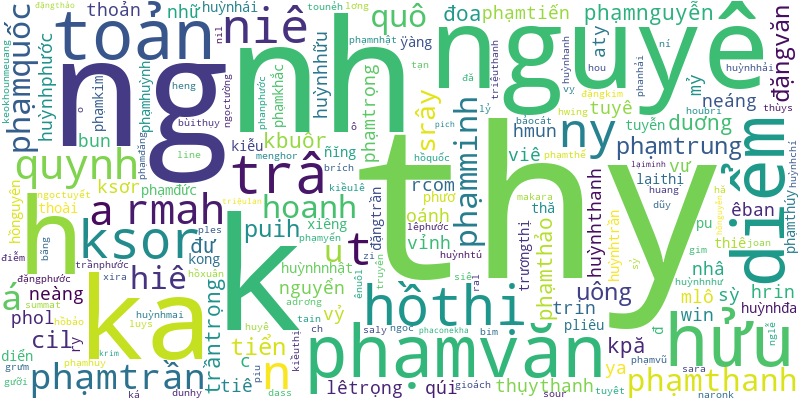

In [476]:
from wordcloud import WordCloud
import random
from PIL import Image
image_width = 800
image_height = 400
# Generate word cloud

# shuffled_items = list(outliers.items())
shuffled_items = list(rmw_freq.items())
random.shuffle(shuffled_items)

# Create a new dictionary from the shuffled items
shuffled_word_freq = dict(shuffled_items)
word_cloud = WordCloud(width=image_width, height=image_height,background_color='white').generate_from_frequencies(shuffled_word_freq)


# Generate the image
image = word_cloud.to_image()

# Show the image
image.show()


## 1.2 Finding the limit parameter

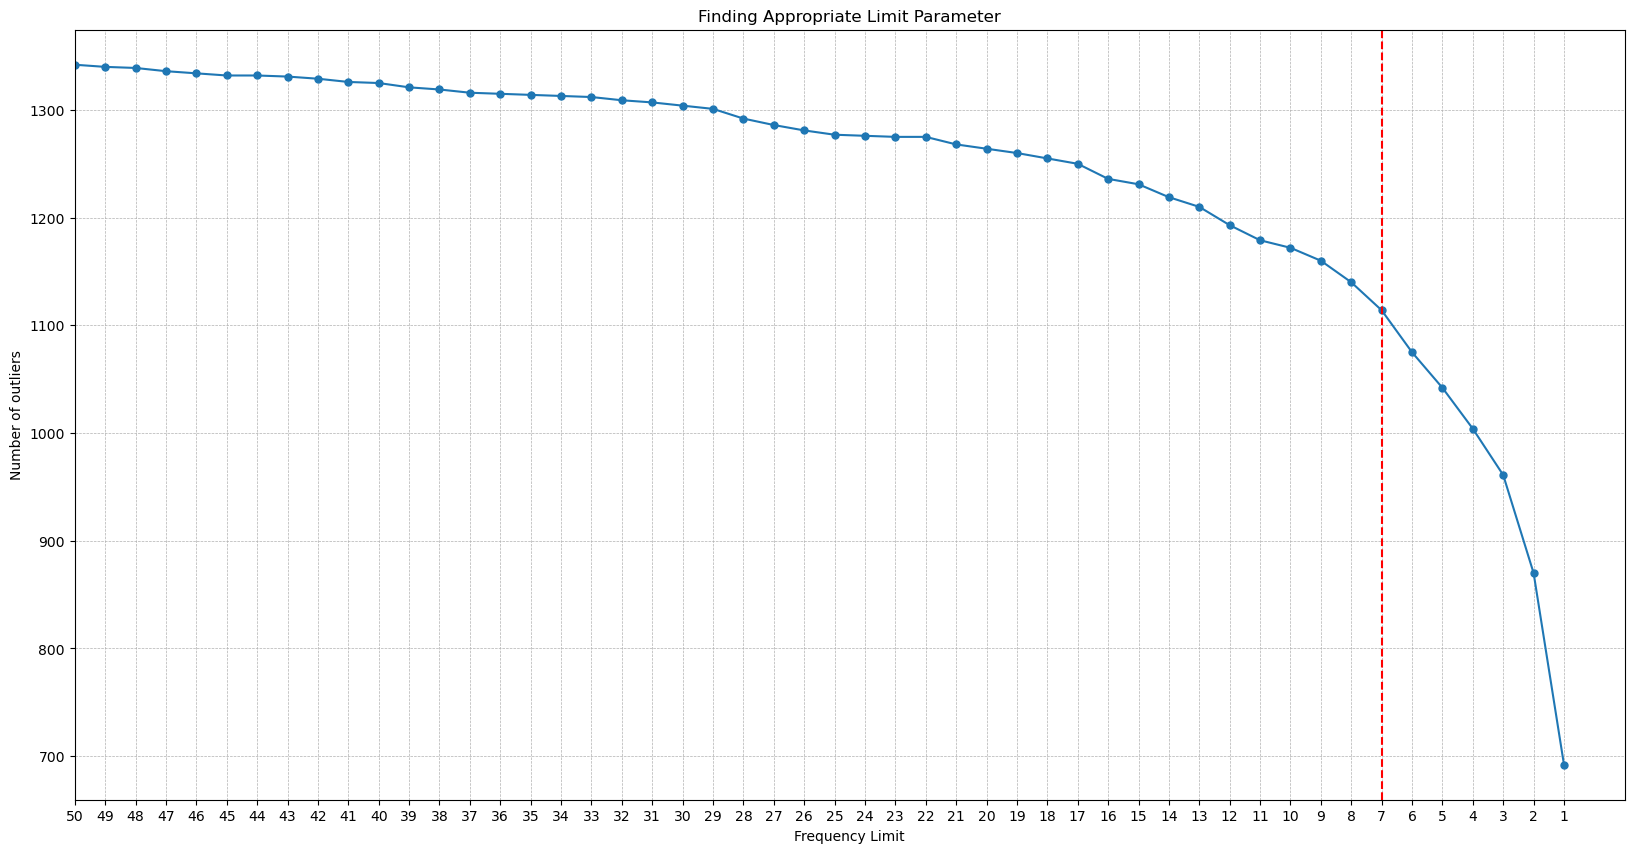

In [461]:
import matplotlib.pyplot as plt

max = 50


# Sample data
x_values = [str(i) for i in range(max, 0, -1)]
y_values = [0]*max

for i,limit in enumerate(x_values):
    for word in word_freq:
      if word_freq[word] <= int(limit):
        y_values[i] += 1  # Counting the number of outliers based on the given frequency limit

# print(y_values)
# Resizing the figure
plt.figure(figsize=(20, 10))

# Plotting the line chart with resized points
plt.plot(x_values, y_values, marker='o', markersize=5)



# Adding labels and title
plt.xlabel('Frequency Limit')
plt.ylabel('Number of outliers')
plt.title('Finding Appropriate Limit Parameter')

# Adding a vertical line
vertical_lines = 43
plt.axvline(x=vertical_lines, color='red', linestyle='--')  # Adding a vertical line at the specified x-coordinate

# Resizing the x-axis
plt.xlim(0, len(x_values) + 1)

# Displaying the chart
plt.grid(True, linestyle='--', linewidth=0.5)
plt.xticks(fontsize=10)

plt.show()


#### How to remove outliers but not normal word with low frequency?

In [464]:
word_freq = dict()
for word in word_lst:
  if word not in word_freq:
    word_freq[word] = 1
  elif word in word_freq:
    word_freq[word]+=1
word_freq["nguyễn"]

5638

In [447]:
limit = 7 # maximum freq is 7
low_freq = dict()
for word in word_freq:
  if word_freq[word] <= limit:
    low_freq[word] = word_freq[word]
print(len(low_freq))
lst =list(low_freq.items())
lst.sort( key = lambda x: x[1], reverse = True)
print(lst[:100])

1114
[('thiệu', 7), ('gấm', 7), ('được', 7), ('phu', 7), ('tứ', 7), ('thuỷ', 7), ('hưởng', 7), ('kỷ', 7), ('xinh', 7), ('chiêu', 7), ('dịu', 7), ('hàn', 7), ('tạo', 7), ('vượng', 7), ('n', 7), ('tha', 7), ('dĩ', 7), ('hiểu', 7), ('ny', 7), ('nhẫn', 7), ('bội', 7), ('san', 7), ('trưởng', 7), ('khởi', 7), ('niê', 7), ('lò', 7), ('tỉnh', 7), ('thiết', 7), ('út', 7), ('đỉnh', 7), ('tới', 7), ('toại', 7), ('bàn', 7), ('thơm', 7), ('ôn', 7), ('lường', 7), ('mẩn', 7), ('dinh', 7), ('hiên', 7), ('xương', 6), ('nhị', 6), ('mơ', 6), ('lễ', 6), ('lĩnh', 6), ('thìn', 6), ('triển', 6), ('nguyện', 6), ('huyên', 6), ('trượng', 6), ('thật', 6), ('ban', 6), ('rơ', 6), ('mang', 6), ('dự', 6), ('thuy', 6), ('ma', 6), ('toán', 6), ('năng', 6), ('tòng', 6), ('trạng', 6), ('tiêu', 6), ('ông', 6), ('chúc', 6), ('siêu', 6), ('ảnh', 6), ('vàng', 6), ('kế', 6), ('t', 6), ('dạ', 6), ('tưởng', 6), ('nho', 6), ('thời', 6), ('tào', 5), ('tam', 5), ('khuyên', 5), ('biên', 5), ('nha', 5), ('ẩn', 5), ('ni', 5), ('lạc'

In [478]:
res_word_freq = dict() #reverse frequency
total_unique = sum(word_freq.values())
print("total_unique",total_unique)
for word in word_freq:
  res_word_freq[word] = total_unique / word_freq[word]
res_word_freq["nguyễn"] 

total_unique 71389


12.662114224902448

In [479]:
limit = 7 # maximum freq is 7
low_freq = dict()
for word in res_word_freq:
  if res_word_freq[word] >= total_unique / limit:
    low_freq[word] = res_word_freq[word]
print(len(low_freq))
lst =list(low_freq.items())
lst.sort( key = lambda x: x[1], reverse = False)
print(lst[:10])

1114
[('thiệu', 10198.42857142857), ('gấm', 10198.42857142857), ('được', 10198.42857142857), ('phu', 10198.42857142857), ('tứ', 10198.42857142857), ('thuỷ', 10198.42857142857), ('hưởng', 10198.42857142857), ('kỷ', 10198.42857142857), ('xinh', 10198.42857142857), ('chiêu', 10198.42857142857)]


#### Visualize all low frequency words ordered by asc (lowest is bigest)

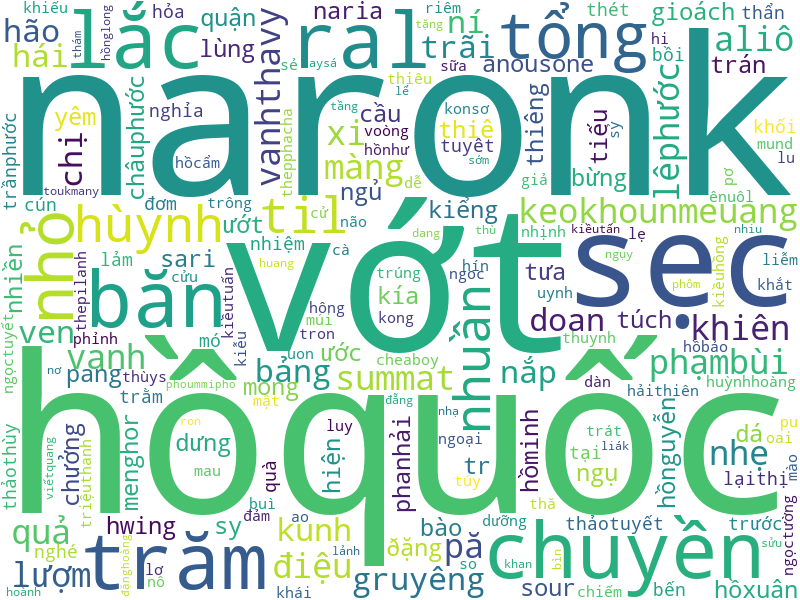

In [480]:
from wordcloud import WordCloud
import random
from PIL import Image
image_width = 800
image_height = 600

# Generate word cloud

shuffled_items = list(res_word_freq.items())
random.shuffle(shuffled_items)

# Create a new dictionary from the shuffled items
shuffled_word_freq = dict(shuffled_items)
word_cloud = WordCloud(width=image_width, height=image_height,background_color='white').generate_from_frequencies(shuffled_word_freq)

# Generate the image
image = word_cloud.to_image()

# Show the image
image.show()


# Processed Data

In [432]:
full_name = df2["Full_Name"]
sex = df2["Gender"]
final_data = {"Full_Name":[],"Gender":[]}
rm = []
for fname, s in zip(full_name,sex):
    a=0
    for word in fname.lower().split() :
        if word in outliers:
            a=1
            break
    if a ==1:
        rm.append(fname)
    if a == 0:
        final_data["Full_Name"].append(fname)
        final_data["Gender"].append(s)



In [433]:
print(len(full_name))
print(len(final_data["Full_Name"]))
print(len(rm))

21217
20647
570


In [274]:
print(len(full_name))
print(len(final_data["Full_Name"]))
print(len(rm))

21174
19270
1904


In [482]:
df_final = pd.DataFrame(final_data)
file_path = origin + "The-Mr.-or-Ms.-Dilemma-Can-You-Guess-Them-All/GenderPrediction/dataset/processed_full_name.csv"
df_final.to_csv(file_path,index=False, sep=',')
df_final.head()


,Full_Name,Gender
0,Ngô Xuân Tùng,1
1,Bùi Dương Thảo Vy,0
2,Lưu Thế Huy,1
3,Nguyễn Thị Vân,0
4,Dương Minh Long,1


In [481]:
# print(rm)

# Processed Dataset Analysis 

In [485]:
gender = df_final["Gender"]
female = 0
male = 0
for g in gender:
    if g == 0:
        female += 1
    else:
        male += 1
        
sex = ["male", "female"]
no = [male, female]


    

<BarContainer object of 2 artists>

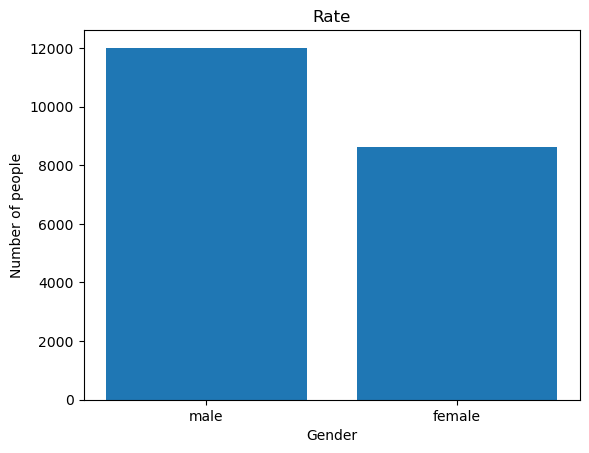

In [486]:
plt.xlabel('Gender')
plt.ylabel('Number of people')
plt.title('Rate')
plt.bar(sex, no)